# Default of Credit Card Clients



Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;
* X23 = amount paid in April, 2005. 


The data was found from 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients# 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [2]:
data_raw = pd.read_csv("default of credit card clients.csv", header=1)

In [3]:
data_raw.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
data_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Data seems to be 30000 observations of 23 columns 
- need to remove ID and dependent variables 

Probably should 

In [5]:
len(data_raw.ID.unique())

30000

Just a quick data check. That each row is a unique ID

In [6]:
per_good = np.sum(data_raw['default payment next month'])/len(data_raw['default payment next month'])
numb_1 = np.sum(data_raw['default payment next month'])

print("There are ", numb_1," dependent observations that are 1. This is ", per_good* 100 , "%  of the data set")

There are  6636  dependent observations that are 1. This is  22.12 %  of the data set


One hot encoding for Marriage and education 

In [85]:
data_raw['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [86]:
data_raw.groupby('EDUCATION')['ID'].nunique()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64

In [89]:
data_raw.groupby('MARRIAGE')['ID'].nunique()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64

Start by separating independent, dependent 

In [7]:
X = data_raw.iloc[0:29999,1:23]
Y = data_raw.iloc[0:29999,24]

In [8]:
from sklearn.model_selection  import train_test_split

In [9]:
X.shape

(29999, 22)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

In [11]:
y_train_avg = sum(y_train)/len(y_train)
y_test_avg = sum(y_test)/len(y_test)
y_avg = sum(Y)/len(Y)

print("Overall dependent average: ", y_avg)
print("Train dependent average: ", y_train_avg) 
print("Test dependent Average: ", y_test_avg)

Overall dependent average:  0.221174039135
Train dependent average:  0.221341531168
Test dependent Average:  0.219666666667


In [12]:
from sklearn.preprocessing import MinMaxScaler

X_train1 = MinMaxScaler().fit_transform(X_train)
X_test1 = MinMaxScaler().fit_transform(X_test)
y_train1 = y_train.as_matrix()
y_test1 = y_test.as_matrix()

In [13]:
#dir(prac1)

In [14]:
type(X_train1)

numpy.ndarray

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout 
from keras import losses 
from ipykernel import kernelapp as app

Using TensorFlow backend.


In [41]:
model = Sequential() 
model.add(Dense(30, input_dim = 22, init = 'uniform'))
model.add(Dropout(0.2))
model.add(Dense(15, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, init = 'uniform', activation = 'relu'))
model.add(Dense(1, init= 'uniform', activation = 'sigmoid'))


C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="uniform", input_dim=22)`
  from ipykernel import kernelapp as app
C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`
C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [42]:
model.compile(loss = 'mse', optimizer = 'adam', metric = ['accuracy'])

In [43]:
scores = model.fit(X_train1, y_train1, nb_epoch = 4, batch_size = 10)

C:\Users\board\Anaconda3\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
C:\Users\board\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2250: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/4
26999/26999 [==============================] - 3s - loss: 0.1592     
Epoch 2/4
26999/26999 [==============================] - 3s - loss: 0.1459     
Epoch 3/4
26999/26999 [==============================] - 3s - loss: 0.1434     
Epoch 4/4
26999/26999 [==============================] - 3s - loss: 0.1420     


In [44]:
train_scores = model.evaluate(X_train1, y_train1)
test_scores = model.evaluate(X_test1, y_test1)

 4416/26999 [===>..........................] - ETA: 0s

C:\Users\board\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2250: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


2496/3000 [=======================>......] - ETA: 0s

In [45]:
from sklearn.metrics import confusion_matrix

In [49]:
print("Train Accuracy:", (1 - train_scores) * 100) 

Train Accuracy: 86.0025229054


In [50]:
print("Test Accuracy: ", (1 - test_scores) * 100)

Test Accuracy:  85.8904114405


In [51]:
nn_test_scores = model.predict_classes(X_test1)
confusion_matrix(y_test1, nn_test_scores)

2624/3000 [=========================>....] - ETA: 0s

array([[2152,  189],
       [ 358,  301]])

### Let's try logisitic regression for kicks and giggles 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [25]:
log_reg = LogisticRegression().fit(X_train, y_train)
log_train_scores = log_reg.score(X_train, y_train)
log_test_scores = log_reg.score(X_test, y_test)

In [26]:
log_reg_norm = LogisticRegression().fit(X_train1, y_train1)
log_norm_train_scores = log_reg.score(X_train1, y_train1)
log_norm_test_scores = log_reg.score(X_test1, y_test1)

In [27]:
print("Log Train Scores: ", log_train_scores)
print("Log Test scores: ", log_test_scores)

Log Train Scores:  0.778547353606
Log Test scores:  0.780333333333


In [28]:
print("Normalized Log Train Scores: ", log_norm_train_scores)
print("Normalized Log Test scores: ", log_norm_test_scores)

Normalized Log Train Scores:  0.782028964036
Normalized Log Test scores:  0.785666666667


In [29]:
log_reg.coef_.shape

(1, 22)

In [30]:
X_train.columns.values
log_reg.coef_

log_reg_coefs ={}
x = 0
for data in X_train.columns.values[0:21]:
    log_reg_coefs[data] = log_reg.coef_[:,x]
    x = x+1 

pprint.pprint(log_reg_coefs)


{'AGE': array([-0.01375756]),
 'BILL_AMT1': array([ -9.81704601e-06]),
 'BILL_AMT2': array([  6.04553363e-06]),
 'BILL_AMT3': array([  2.36633057e-06]),
 'BILL_AMT4': array([ -4.64297248e-07]),
 'BILL_AMT5': array([  4.81247327e-06]),
 'BILL_AMT6': array([  1.54985899e-06]),
 'EDUCATION': array([-0.00110427]),
 'LIMIT_BAL': array([ -3.44598953e-06]),
 'MARRIAGE': array([-0.001023]),
 'PAY_0': array([ 0.00173328]),
 'PAY_2': array([ 0.00134999]),
 'PAY_3': array([ 0.0011867]),
 'PAY_4': array([ 0.00108641]),
 'PAY_5': array([ 0.00099972]),
 'PAY_6': array([ 0.00092898]),
 'PAY_AMT1': array([ -3.00161555e-05]),
 'PAY_AMT2': array([ -2.10602580e-05]),
 'PAY_AMT3': array([ -8.04567046e-06]),
 'PAY_AMT4': array([ -1.04278581e-05]),
 'SEX': array([-0.00094612])}


In [31]:
log_reg_scores = log_reg.predict(X_test)
confusion_matrix(y_test, log_reg_scores)

array([[2341,    0],
       [ 659,    0]])

Notice the logisitc regression just votes no all of the time and gets an accuracy of 78.5% 

We have a class imbalance problem

### Let's Try using Sklearn 

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN_parameter_tuning_df = pd.DataFrame(data = {'CV': 0,
                                            'Num Neighbors':3}, index = range(1,3,1))
j = 1 # index for number of loops 
for num_neighbors in range(3, 40, 3):
    KNN_sample = KNeighborsClassifier(n_neighbors = num_neighbors)
    CV = cross_val_score(KNN_sample, X_train,y_train,cv= 8).mean()
    KNN_parameter_tuning_df.loc[j] = [CV, num_neighbors]
    j = j+1 

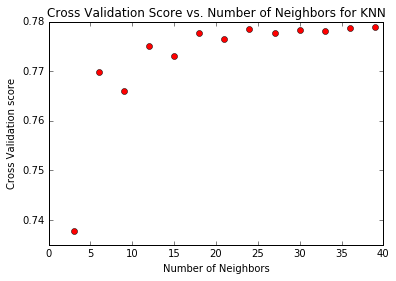

In [33]:
plt.plot(KNN_parameter_tuning_df['Num Neighbors'], KNN_parameter_tuning_df['CV'], 'ro')
plt.title("Cross Validation Score vs. Number of Neighbors for KNN")
plt.ylabel("Cross Validation score")
plt.xlabel("Number of Neighbors")


### Random Forest 

Quick random forest to check another accuracy 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf1 = RandomForestClassifier().fit(X_train, y_train)

In [36]:
rf1.feature_importances_
X_train.columns.values

rf1_imp ={}
x = 0
for data in X_train.columns.values[0:21]:
    rf1_imp[data] = rf1.feature_importances_[x]
    x = x+1 

pprint.pprint(rf1_imp)

{'AGE': 0.070029776132788032,
 'BILL_AMT1': 0.06577377829619209,
 'BILL_AMT2': 0.056822381531895116,
 'BILL_AMT3': 0.05465494026106639,
 'BILL_AMT4': 0.053727269743532771,
 'BILL_AMT5': 0.052501741617798602,
 'BILL_AMT6': 0.053845814695475738,
 'EDUCATION': 0.022038192952193857,
 'LIMIT_BAL': 0.06285193278461311,
 'MARRIAGE': 0.013699636737573684,
 'PAY_0': 0.08722408375115151,
 'PAY_2': 0.057007770912074027,
 'PAY_3': 0.029352639215270326,
 'PAY_4': 0.022465131302792301,
 'PAY_5': 0.013975578729408879,
 'PAY_6': 0.026545570081804498,
 'PAY_AMT1': 0.053536672177790734,
 'PAY_AMT2': 0.050900705491691955,
 'PAY_AMT3': 0.047733713962820154,
 'PAY_AMT4': 0.047361869236603182,
 'SEX': 0.012368477750191622}


In [52]:
rf1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
rf1.score(X_train, y_train)

0.97940664469054406

In [38]:
rf1.score(X_test, y_test)

0.80766666666666664

In [39]:
rf1_test_scores = rf1.predict(X_test)
confusion_matrix(y_test, rf1_test_scores)

array([[2207,  134],
       [ 443,  216]])

### Let's try finding the best Random Forest 

We will use a randomized search to try and find the best random forest model 

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
# specify parameters and distributions to sample from
param_dist = {"n_estimators": [10, 30, 100, 200, 400, 600], 
              "max_depth": [1,3, 5, None],
              "min_samples_split": [2,3,7,13],
              "min_samples_leaf": [2,3,7,11],
              "max_leaf_nodes": [None, 3, 4]
              }
n_iter_search = 10

In [65]:
rf_rand_search = RandomizedSearchCV(RandomForestClassifier(oob_score=True), param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [66]:
rf_rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'min_samples_leaf': [2, 3, 7, 11], 'max_leaf_nodes': [None, 3, 4], 'max_depth': [1, 3, 5, None], 'n_estimators': [10, 30, 100, 200, 400, 600], 'min_samples_split': [2, 3, 7, 13]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [76]:
#pprint.pprint(rf_rand_search.cv_results_)

In [77]:
print("Best RF Train Accuracy: ", rf_rand_search.best_score_) 
rf_best = rf_rand_search.best_estimator_
rf_best

Best RF Train Accuracy:  0.818178451054


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=11,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [108]:
rf_best_imp ={}
rf_best_imp['1Variable'] = ["RF Best", "RF Out of Box"]
x = 0
for data in X_train.columns.values[0:21]:
    x = x+1
    rf_best_imp[data] = [rf_best.feature_importances_[x],
                         rf1.feature_importances_[x]]


pprint.pprint(rf_best_imp)

{'1Variable': ['RF Best', 'RF Out of Box'],
 'AGE': [0.20531764706003375, 0.08722408375115151],
 'BILL_AMT1': [0.040727284038310968, 0.056822381531895116],
 'BILL_AMT2': [0.037596513791242001, 0.05465494026106639],
 'BILL_AMT3': [0.035171403501734845, 0.053727269743532771],
 'BILL_AMT4': [0.035417675217548149, 0.052501741617798602],
 'BILL_AMT5': [0.0347769961783954, 0.053845814695475738],
 'BILL_AMT6': [0.045573707243558699, 0.053536672177790734],
 'EDUCATION': [0.0069722620456509447, 0.013699636737573684],
 'LIMIT_BAL': [0.0073106879416705416, 0.012368477750191622],
 'MARRIAGE': [0.036635475277330319, 0.070029776132788032],
 'PAY_0': [0.10380190798088536, 0.057007770912074027],
 'PAY_2': [0.059081557342987666, 0.029352639215270326],
 'PAY_3': [0.038626352971704123, 0.022465131302792301],
 'PAY_4': [0.034344054179671429, 0.013975578729408879],
 'PAY_5': [0.028993534670653603, 0.026545570081804498],
 'PAY_6': [0.047030230252577174, 0.06577377829619209],
 'PAY_AMT1': [0.0398193042292842

In [80]:
rf_rand_scores = rf_best.predict(X_test)
print("RF Test Accuracy: ", rf_best.score(X_test, y_test) * 100)
confusion_matrix(y_test, rf_rand_scores)

RF Test Accuracy:  82.9666666667


array([[2232,  109],
       [ 402,  257]])

### Let's Look at the ROC Curves 

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

In [92]:
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test1, nn_test_scores)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_rand_scores)
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_reg_scores)

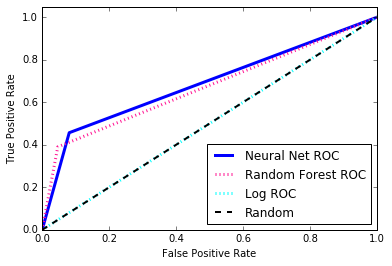

In [97]:
plt.plot(nn_fpr, nn_tpr, 
        label = "Neural Net ROC", 
        color = "blue", linestyle = '-', linewidth = 3)

plt.plot(rf_fpr, rf_tpr,
        label = "Random Forest ROC", 
        color = "deeppink", linestyle = ":", linewidth = 3)

plt.plot(log_fpr, log_tpr, 
        label = "Log ROC", 
        color = "aqua", linestyle = ":", linewidth = 3)

plt.plot([0,1], [0,1], 'k--', lw = 2, label = "Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()